Epoch 1/100
2/2 [==============================] - 8s 1s/step - loss: 0.6943 - accuracy: 0.3333 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 63ms/step - loss: 0.6937 - accuracy: 0.3333 - val_loss: 0.6975 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 63ms/step - loss: 0.6914 - accuracy: 0.6667 - val_loss: 0.6988 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6903 - accuracy: 0.6667 - val_loss: 0.6996 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 60ms/step - loss: 0.6902 - accuracy: 0.6667 - val_loss: 0.7018 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 65ms/step - loss: 0.6892 - accuracy: 0.6667 - val_loss: 0.7033 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 70ms/step - loss: 0.6879 - accuracy: 0.6667 - val_loss: 0.7042 - val_accuracy: 0.000

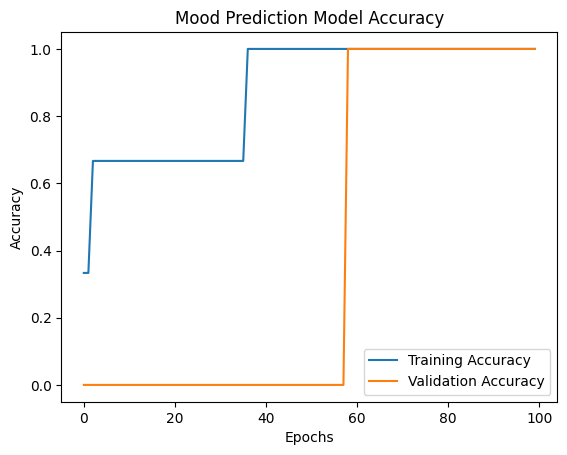

1/1 [==============================] - 0s 37ms/step - loss: 0.4026 - accuracy: 0.5000
Test Accuracy for mood prediction: 50.00%
Epoch 1/100
2/2 [==============================] - 8s 1s/step - loss: 0.6934 - accuracy: 0.3333 - val_loss: 0.6967 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 70ms/step - loss: 0.6902 - accuracy: 0.6667 - val_loss: 0.7024 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 64ms/step - loss: 0.6881 - accuracy: 0.6667 - val_loss: 0.7092 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 67ms/step - loss: 0.6882 - accuracy: 0.6667 - val_loss: 0.7155 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6857 - accuracy: 0.6667 - val_loss: 0.7191 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 67ms/step - loss: 0.6829 - accuracy: 0.6667 - val_loss: 0.7214 - val_accuracy: 0.0000e+00
Epoch 7/10

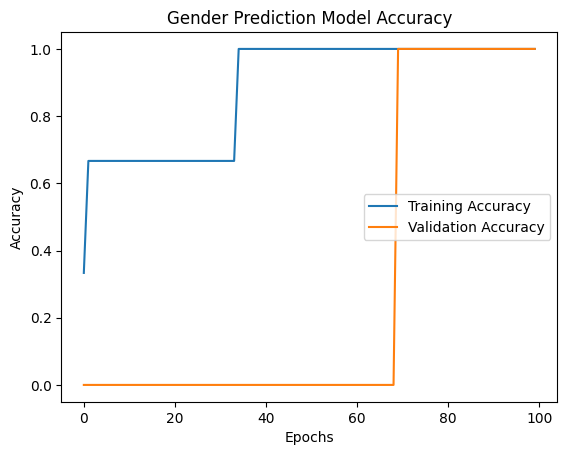

1/1 [==============================] - 0s 54ms/step - loss: 1.2063 - accuracy: 0.5000
Test Accuracy for gender prediction: 50.00%


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
from keras.utils import pad_sequences

# Original data
data = {'text': ['I love the sunshine', 'Feeling down today', 'This is a happy moment', 'I am sad', 'Great news!', 'Feeling blue'],
        'mood': ['cheerful', 'sad', 'cheerful', 'sad', 'cheerful', 'sad'],
        'gender': ['female', 'male', 'female', 'male', 'female', 'male']}
df = pd.DataFrame(data)

# Label Encoding for 'mood' and 'gender'
label_encoder = LabelEncoder()
df['mood_encoded'] = label_encoder.fit_transform(df['mood'])
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

# Split the data into training and testing sets
train_texts, test_texts, train_moods, test_moods, train_genders, test_genders = train_test_split(
    df['text'].values, df['mood_encoded'].values, df['gender_encoded'].values, test_size=0.2, random_state=42
)

# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to have consistent length
max_sequence_length = max(len(seq) for seq in train_sequences + test_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Build the LSTM model for mood prediction
embedding_dim = 16
model_mood = Sequential()
model_mood.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model_mood.add(LSTM(32, return_sequences=True))
model_mood.add(LSTM(32))
model_mood.add(Dense(64, activation='relu'))
model_mood.add(Dense(32, activation='relu'))
model_mood.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the mood model
model_mood.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the mood model
history_mood = model_mood.fit(train_data, train_moods, epochs=100, batch_size=2, validation_split=0.2)

# Plot accuracy for mood prediction
plt.plot(history_mood.history['accuracy'], label='Training Accuracy')
plt.plot(history_mood.history['val_accuracy'], label='Validation Accuracy')
plt.title('Mood Prediction Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the mood model on test data
loss_mood, accuracy_mood = model_mood.evaluate(test_data, test_moods)
print(f'Test Accuracy for mood prediction: {accuracy_mood * 100:.2f}%')

# Repeat the process for gender prediction
model_gender = Sequential()
model_gender.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model_gender.add(LSTM(32, return_sequences=True))
model_gender.add(LSTM(32))
model_gender.add(Dense(64, activation='relu'))
model_gender.add(Dense(32, activation='relu'))
model_gender.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the gender model
model_gender.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the gender model
history_gender = model_gender.fit(train_data, train_genders, epochs=100, batch_size=2, validation_split=0.2)

# Plot accuracy for gender prediction
plt.plot(history_gender.history['accuracy'], label='Training Accuracy')
plt.plot(history_gender.history['val_accuracy'], label='Validation Accuracy')
plt.title('Gender Prediction Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the gender model on test data
loss_gender, accuracy_gender = model_gender.evaluate(test_data, test_genders)
print(f'Test Accuracy for gender prediction: {accuracy_gender * 100:.2f}%')